## Assignment 4

This is assignment needs to be handed in on teams by midnight on Tuesday 18-10-2022.

The documents to hand in are:
- A jupyter notebook you used to execute the assignment. Including any files such as .csv files which you've accessed in the notebook.
- A pdf document of maximum 4 pages A4 Landscape (We will view it on screen so that's why we're sticking to landscape), in which you explain your process, the nature of the data you analysed, visualisations of the results, and the conclusions you were able to draw from this. 

#### The Assignment

You will have to find a dataset of your choice, and train a SOM on this dataset. Following this you will demonstrate you understand the nature of the SOM technology, and also the results it produces. Feel free to use any additional analysis methods to enrich your analysis.

## Assignment Prediction Method 1 - SOM(Self-organizing mapping neural network)

**INTRODUCTION**

File:Housing in south California in America
Description: housing property has become an important data in people's choose of living in the factors of location, age,housing qualities, density,incom, etc.And according to the housing data, we can predict some data such as the housing location and housing qualities which is suitable for your age, income,and family. Therefore, I used this data as the source of training to let machine predict your own remmondation of accommodation.


**## RESEARCH QUESTIONS:**
1. Does the housing location has relationship with population?
2. How is income condition in different ages in population? 
3. What is the trends of housing value with different location of ocean_proximity?
4. Does the number of rooms will impact with households?
5. Prediction：will people be willing to live nearbay,inland...of this town/city/location？Based on the data, what kind of location is suitable for specific people.

**## FEATURES:**

a.long. and lat.:the locaton in the map

b. housing median age

c.number of rooms and bedrooms

d. populaton in different lon and lat:density of people

e.households:family number

f.self_income: income of people that could afford the housing

g.house value

h.ocean_proximity(this data is a judge data):define the proximate location of housing

STEP ONE:IMPORT THE PACKAGES

Description:

In this step I will anaylse the basic information of data to test some script and trends or relationships that mey be related to my data. Therefore, I started with the most stright forward data-population to see the division of population.

In [33]:
import pandas as pd
import numpy as np
from sompy import SOMFactory
import random
import joblib
import glob
import matplotlib.pyplot as plt
import matplotlib
from sompy.visualization.plot_tools import plot_hex_map

STEP TWO:CHECK AND READ THE FILE

In [34]:
dfO = pd.read_csv("housing.csv")
dfO

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


STEP THREE:BASIC DATA VISUALIZATION

1. Locate the position

As the map shown below, this dataset is collecting the housing from the south of America, therefore, it will only show this pat to show the basic information that data has

In [35]:
import folium

map_obj = folium.Map(location = [37.829108, -120.540993], zoom_start = 7)

map_obj

In [36]:
import pandas as pd
#read file
population_data = pd.read_csv("housing.csv")

#first 20 data
population_data.head(5)

#define the location,check the popultion with first 5
lats_longs_weight = list(map(list, zip(population_data["latitude"],
                          population_data["longitude"],
                          population_data["population"]
                         )
               )
           )
lats_longs_weight[:1]

#import folium
import folium
from folium.plugins import HeatMap

map_obj = folium.Map(location = [37.829108, -120.540993], zoom_start = 10)

HeatMap(lats_longs_weight).add_to(map_obj)

map_obj

Result:

As you can see, it is clear that bigger town contains higher population, which means that housing properties may impact with the population. However, let's keep moving.

2. How is income condition in different ages in population? 

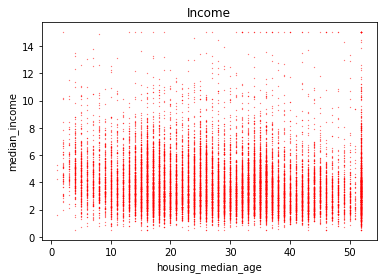

In [37]:
#fig = plt.figure(figsize=(20,20), dpi=200)
plt.scatter(dfO["housing_median_age"], dfO["median_income"], c='r', s=0.05) # 'r' is the color red, s=1 is the size
plt.xlabel('housing_median_age')
plt.ylabel('median_income')
plt.title('Income')
plt.show()

As you can see, the range of income is basically within 8, and income from different age is similar. Therefore, the age and income may impact with oher factors.

3. What is the trends of housing value with different location of ocean_proximity?

In [38]:
dfnew=dfO.groupby("ocean_proximity")
#group: combin dataframes.like all values of same name will be grouped(group from row index)
#groupby.mean():result will be the average after groupby
dfnew.mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


In [72]:
#   Test the data
dfMean=dfnew.mean()
dfMean.loc['INLAND','median_house_value']

124805.39200122119

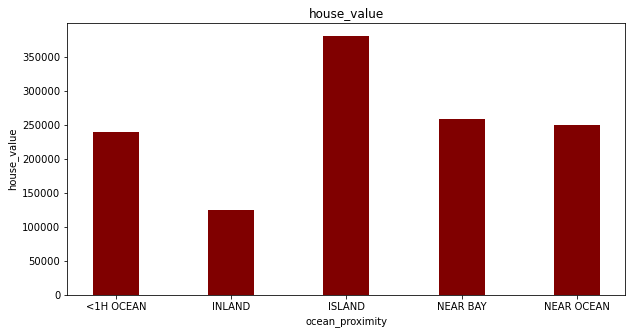

In [75]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'<1H OCEAN':dfMean.loc['<1H OCEAN','median_house_value'], 'INLAND':dfMean.loc['INLAND','median_house_value'], 'ISLAND':dfMean.loc['ISLAND','median_house_value'],
        'NEAR BAY':dfMean.loc['NEAR BAY','median_house_value'],'NEAR OCEAN':dfMean.loc['NEAR OCEAN','median_house_value']}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10,5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("ocean_proximity")
plt.ylabel("house_value")
plt.title("house_value")
plt.show()

Result:The location of housing has some relationship with housing value. Island has the highest price around the other locations. and it seems that it also have more housing number there.

**SOM Practice**：

**Fields description**
__________________________
1.	**Year**:	2008
2.	**Month**:	1-12
3.	**DayofMonth**:	1-31
4.	**DayOfWeek**:	1 (Monday) - 7 (Sunday)
5.	**DepTime**:	actual departure time (local, hhmm)
6.	**CRSDepTime**:	scheduled departure time (local, hhmm)
7.	**ArrTime**:	actual arrival time (local, hhmm)
8.	**CRSArrTime**:	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**:	unique carrier code
10.	**FlightNum**:	flight number
11.	**TailNum**:	plane tail number
12.	**ActualElapsedTime**:	in minutes
13.	**CRSElapsedTime**:	in minutes
14.	**AirTime**:	in minutes
15.	**ArrDelay**:	arrival delay, in minutes
16.	**DepDelay**:	departure delay, in minutes
17.	**Origin**:	origin IATA airport code
18.	**Dest**:	destination IATA airport code
19.	**Distance**:	in miles
20.	**TaxiIn**:	taxi in time, in minutes
21.	**TaxiOut**:	taxi out time in minutes
22.	**Cancelled**:	was the flight cancelled?
23.	**CancellationCode**:	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**:	1 = yes, 0 = no
25.	**CarrierDelay**:	in minutes
26.	**WeatherDelay**:	in minutes
27.	**NASDelay**:	National Air System delay in minutes
28.	**SecurityDelay**	in minutes
29.	**LateAircraftDelay**	in minutes